This Notebookis heavily adapted from a Coursera project that was intended to run on SageMaker; however, after three attempts the Kernal kept dying so I moved it to my local machine where it ran like a charm (in spite of the fact I was playing Civilization V while the model was building).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from autogluon.tabular import TabularDataset, TabularPredictor

In [2]:
df = pd.read_csv('university_admission.csv')
df.shape

(500, 8)

In [4]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
#Calculate the average, minimum and maximum Chances of Admission in the DataFrame
average_chances = df['Chance of Admit'].mean()
min_chances = df['Chance of Admit'].min()
max_chances = df['Chance of Admit'].max()
print(f"Average Chances of Admit: {average_chances}")
print(f"Minimum Chances of Admit: {min_chances}")
print(f"Maximum Chances of Admit: {max_chances}")

Average Chances of Admit: 0.72174
Minimum Chances of Admit: 0.34
Maximum Chances of Admit: 0.97


In [6]:
# Generate statistical summary
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
# Obtain dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [11]:
# determine the prercent of nulls
print("Total null values in DataFrame:", df.isnull().sum().sum())

Total null values in DataFrame: 0


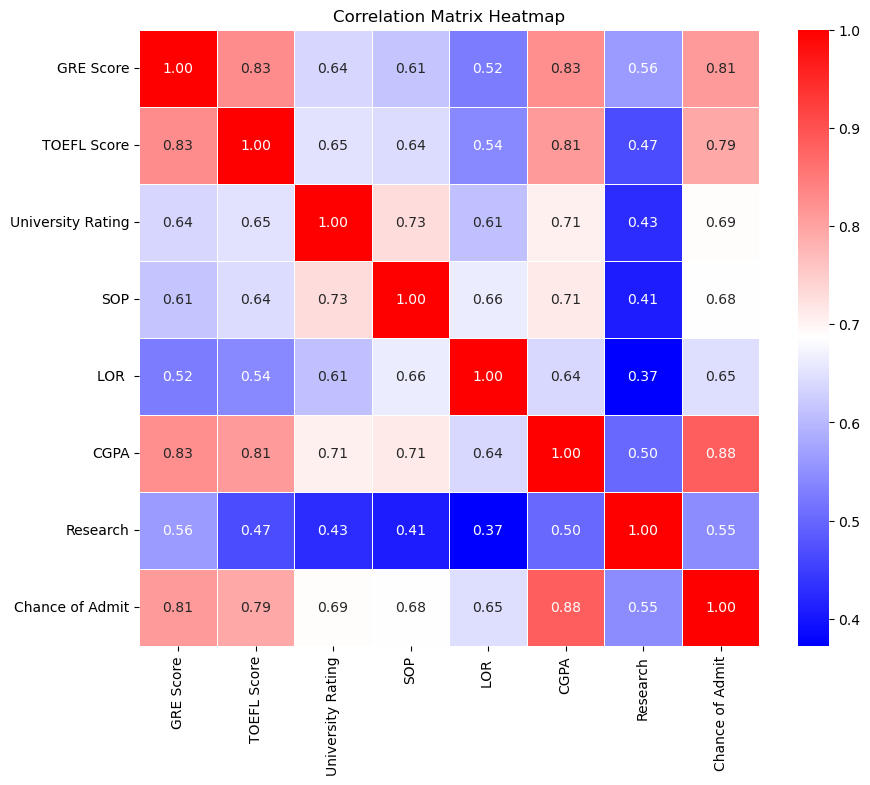

In [18]:
# Let's take a look at corelation to see what jumps out 
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='bwr', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Based on the heat map, we will look at three regression plots for TOEFL, GRE, CGPA tp examine relationsships determining the chance of admission.

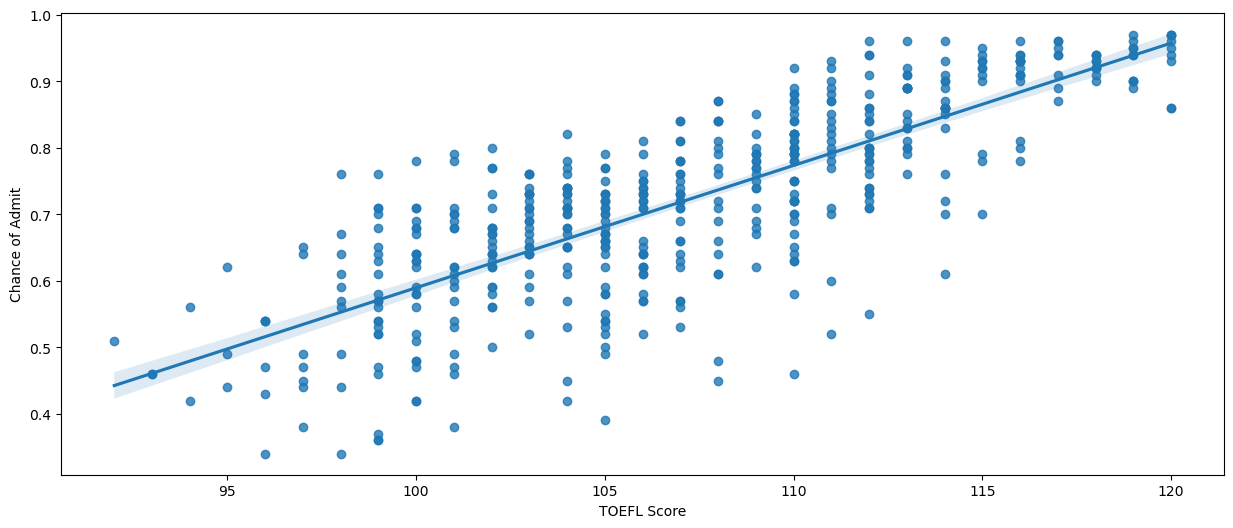

In [19]:
# First TOEFL score
plt.figure(figsize = (15, 6))
sns.regplot(x = 'TOEFL Score', y = 'Chance of Admit', data = df)
plt.show()

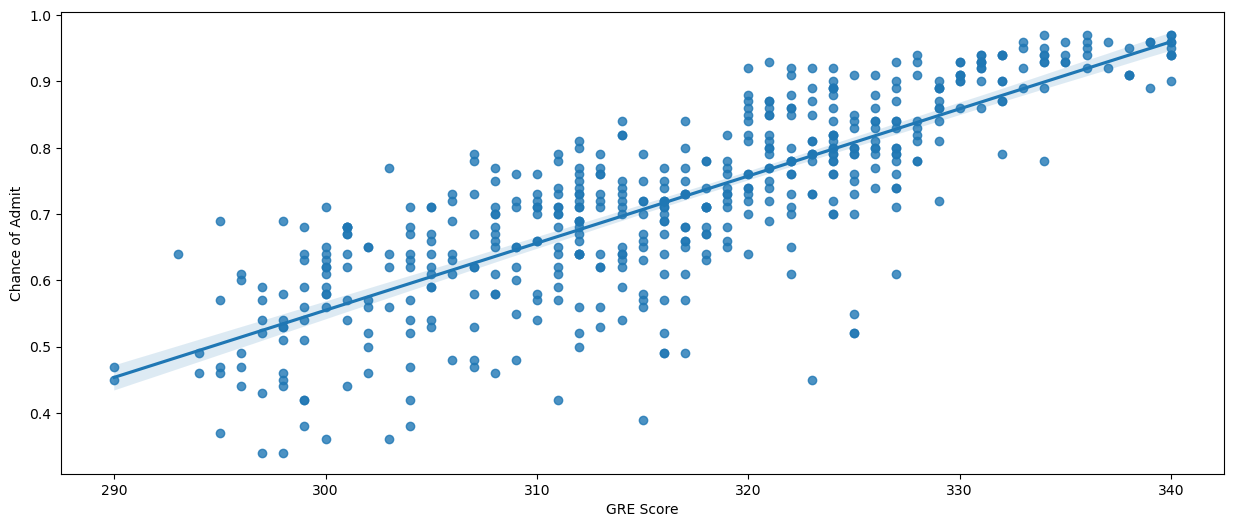

In [20]:
#second GRE score 
plt.figure(figsize = (15, 6))
sns.regplot(x = 'GRE Score', y = 'Chance of Admit', data = df)
plt.show()

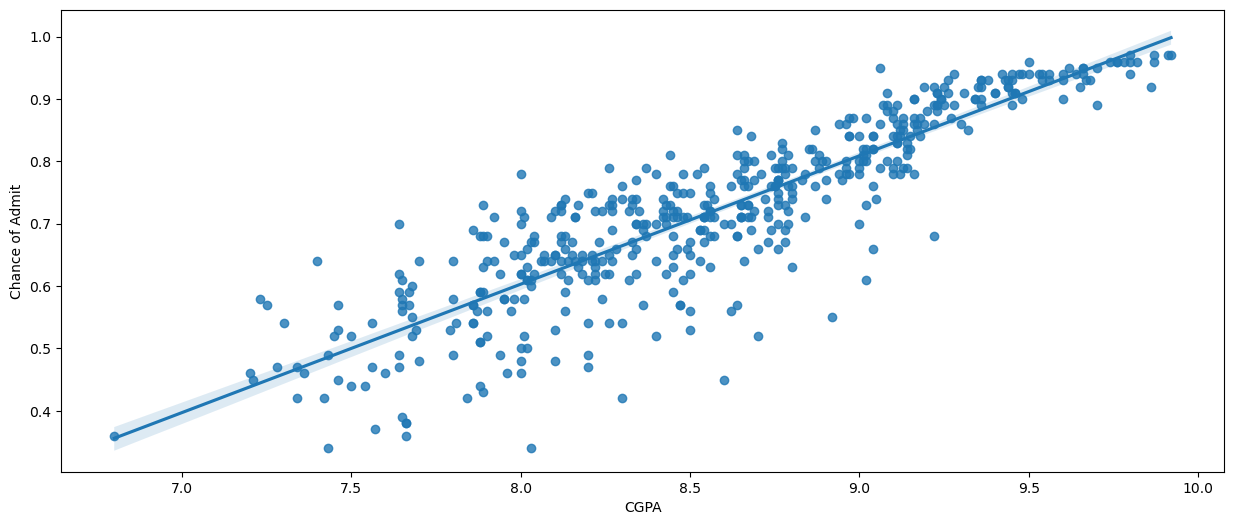

In [21]:
#Third CGPA score 
plt.figure(figsize = (15, 6))
sns.regplot(x = 'CGPA', y = 'Chance of Admit', data = df)
plt.show()

Reviewing the corrolation heatmap, the items with the greatest impact on admission are GRE score, Toefl score, and CGPA (cumulative grear point average).

In [22]:
# now to the main event - AUTOGLUON
# Split the data into 80% for training and 20% for testing using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size=0.2, random_state=0)

In [23]:
# confirm split shapes
print(f'X_train shape = {X_train.shape}, X_test shape = {X_test.shape}')

X_train shape = (400, 8), X_test shape = (100, 8)


In [24]:
# Train multiple ML regression models using AutoGluon
predictor = TabularPredictor(label = "Chance of Admit", 
                             problem_type = 'regression', 
                             eval_metric = 'r2'
                            ).fit(train_data = X_train, time_limit = 200, 
                                  presets = "good_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240726_173715"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.4
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 23.4.0: Fri Mar 15 00:12:37 PDT 2024; root:xnu-10063.101.17~1/RELEASE_ARM64_T6031
CPU Count:          14
Memory Avail:       2.66 GB / 36.00 GB (7.4%)
Disk Space Avail:   558.84 GB / 926.35 GB (60.3%)
Presets specified: ['good_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this r

(_dystack pid=55732) 	Warning: Exception caused LightGBM_BAG_L1 to fail during training (ImportError)... Skipping this model.
(_dystack pid=55732) 		ray::_ray_fit() (pid=55749, ip=127.0.0.1)
(_dystack pid=55732)   File "/Users/michaelmohle/anaconda3/lib/python3.11/site-packages/lightgbm/__init__.py", line 8, in <module>
(_dystack pid=55732)     from .basic import Booster, Dataset, Sequence, register_logger
(_dystack pid=55732)   File "/Users/michaelmohle/anaconda3/lib/python3.11/site-packages/lightgbm/basic.py", line 247, in <module>
(_dystack pid=55732)     _LIB = _load_lib()
(_dystack pid=55732)            ^^^^^^^^^^^
(_dystack pid=55732)   File "/Users/michaelmohle/anaconda3/lib/python3.11/site-packages/lightgbm/basic.py", line 232, in _load_lib
(_dystack pid=55732)     lib = ctypes.cdll.LoadLibrary(lib_path[0])
(_dystack pid=55732)           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(_dystack pid=55732)   File "/Users/michaelmohle/anaconda3/lib/python3.11/ctypes/__init__.py", line 454, 

(_dystack pid=55732) 	0.7951	 = Validation score   (r2)
(_dystack pid=55732) 	0.37s	 = Training   runtime
(_dystack pid=55732) 	0.05s	 = Validation runtime
(_dystack pid=55732) Fitting model: CatBoost_BAG_L1 ... Training model for up to 24.35s of the 39.88s of remaining time.
(_dystack pid=55732) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.11%)
(_dystack pid=55732) 	Warning: Exception caused CatBoost_BAG_L1 to fail during training (ImportError)... Skipping this model.
(_dystack pid=55732) 		ray::_ray_fit() (pid=55755, ip=127.0.0.1)
(_dystack pid=55732) ModuleNotFoundError: No module named 'catboost'
(_dystack pid=55732) 
(_dystack pid=55732) During handling of the above exception, another exception occurred:
(_dystack pid=55732) 
(_dystack pid=55732) ray::_ray_fit() (pid=55755, ip=127.0.0.1)
(_dystack pid=55732)   File "/Users/michaelmohle/anaconda3/lib/python3.11/site-packages/autogluon/core/models/ens

(_dystack pid=55732) 	0.8127	 = Validation score   (r2)
(_dystack pid=55732) 	0.25s	 = Training   runtime
(_dystack pid=55732) 	0.05s	 = Validation runtime
(_dystack pid=55732) Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 22.36s of the 37.88s of remaining time.
(_dystack pid=55732) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.01%)
(_dystack pid=55732) 	0.8204	 = Validation score   (r2)
(_dystack pid=55732) 	2.27s	 = Training   runtime
(_dystack pid=55732) 	0.05s	 = Validation runtime
(_dystack pid=55732) Fitting model: XGBoost_BAG_L1 ... Training model for up to 18.44s of the 33.97s of remaining time.
(_dystack pid=55732) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.11%)
(_dystack pid=55732) 	0.7797	 = Validation score   (r2)
(_dystack pid=55732) 	0.22s	 = Training   runtime
(_dystack pid=55732) 	0.01

(_dystack pid=55732) 	Warning: Exception caused LightGBM_BAG_L2 to fail during training (ImportError)... Skipping this model.
(_dystack pid=55732) 		ray::_ray_fit() (pid=55820, ip=127.0.0.1)
(_dystack pid=55732)   File "/Users/michaelmohle/anaconda3/lib/python3.11/site-packages/lightgbm/__init__.py", line 8, in <module>
(_dystack pid=55732)     from .basic import Booster, Dataset, Sequence, register_logger
(_dystack pid=55732)   File "/Users/michaelmohle/anaconda3/lib/python3.11/site-packages/lightgbm/basic.py", line 247, in <module>
(_dystack pid=55732)     _LIB = _load_lib()
(_dystack pid=55732)            ^^^^^^^^^^^
(_dystack pid=55732)   File "/Users/michaelmohle/anaconda3/lib/python3.11/site-packages/lightgbm/basic.py", line 232, in _load_lib
(_dystack pid=55732)     lib = ctypes.cdll.LoadLibrary(lib_path[0])
(_dystack pid=55732)           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
(_dystack pid=55732)   File "/Users/michaelmohle/anaconda3/lib/python3.11/ctypes/__init__.py", line 454, 

(_dystack pid=55732) 	0.8172	 = Validation score   (r2)
(_dystack pid=55732) 	0.2s	 = Training   runtime
(_dystack pid=55732) 	0.04s	 = Validation runtime
(_dystack pid=55732) Fitting model: CatBoost_BAG_L2 ... Training model for up to 20.41s of the 20.4s of remaining time.
(_dystack pid=55732) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.17%)
(_dystack pid=55732) 	Warning: Exception caused CatBoost_BAG_L2 to fail during training (ImportError)... Skipping this model.
(_dystack pid=55732) 		ray::_ray_fit() (pid=55829, ip=127.0.0.1)
(_dystack pid=55732) ModuleNotFoundError: No module named 'catboost'
(_dystack pid=55732) 
(_dystack pid=55732) During handling of the above exception, another exception occurred:
(_dystack pid=55732) 
(_dystack pid=55732) ray::_ray_fit() (pid=55829, ip=127.0.0.1)
(_dystack pid=55732)   File "/Users/michaelmohle/anaconda3/lib/python3.11/site-packages/autogluon/core/models/ensem

(_dystack pid=55732) Fitting 1 L1 models ...
(_dystack pid=55732) Fitting model: NeuralNetFastAI_BAG_L1_FULL ...
(_dystack pid=55732) 	Stopping at the best epoch learned earlier - 26.
(_dystack pid=55732) 	0.31s	 = Training   runtime
(_dystack pid=55732) Fitting 1 L1 models ...
(_dystack pid=55732) Fitting model: XGBoost_BAG_L1_FULL ...
(_dystack pid=55732) 	0.12s	 = Training   runtime
(_dystack pid=55732) Fitting 1 L1 models ...
(_dystack pid=55732) Fitting model: NeuralNetTorch_BAG_L1_FULL ...
(_dystack pid=55732) Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
(_dystack pid=55732) Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_ray_fit() (pid=55881, ip=127.0.0.1)
(_dystack pid=55732)   File "/Users/michaelmohle/anaconda3/lib/python3.11/site-packages/lightgbm/__init__.py", line 8, in <module>
(_dystack pid=55732)     from .basic im

(_dystack pid=55732) 	1.32s	 = Training   runtime
(_dystack pid=55732) Fitting model: WeightedEnsemble_L2_FULL | Skipping fit via cloning parent ...
(_dystack pid=55732) 	Ensemble Weights: {'NeuralNetTorch_BAG_L1': 0.737, 'NeuralNetFastAI_BAG_L1': 0.211, 'RandomForestMSE_BAG_L1': 0.053}
(_dystack pid=55732) 	0.02s	 = Training   runtime
(_dystack pid=55732) Fitting model: RandomForestMSE_BAG_L2_FULL | Skipping fit via cloning parent ...
(_dystack pid=55732) 	0.2s	 = Training   runtime
(_dystack pid=55732) 	0.04s	 = Validation runtime
(_dystack pid=55732) Fitting model: ExtraTreesMSE_BAG_L2_FULL | Skipping fit via cloning parent ...
(_dystack pid=55732) 	0.19s	 = Training   runtime
(_dystack pid=55732) 	0.05s	 = Validation runtime
(_dystack pid=55732) Fitting 1 L2 models ...
(_dystack pid=55732) Fitting model: NeuralNetFastAI_BAG_L2_FULL ...
(_dystack pid=55732) 	Stopping at the best epoch learned earlier - 24.
(_dystack pid=55732) 	0.25s	 = Training   runtime
(_dystack pid=55732) Fittin

Fitting 9 L1 models ...
Fitting model: LightGBMXT_BAG_L1 ... Training model for up to 150.43s of the 150.43s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.05%)
		ray::_ray_fit() (pid=55889, ip=127.0.0.1)
  File "/Users/michaelmohle/anaconda3/lib/python3.11/site-packages/lightgbm/__init__.py", line 8, in <module>
    from .basic import Booster, Dataset, Sequence, register_logger
  File "/Users/michaelmohle/anaconda3/lib/python3.11/site-packages/lightgbm/basic.py", line 247, in <module>
    _LIB = _load_lib()
           ^^^^^^^^^^^
  File "/Users/michaelmohle/anaconda3/lib/python3.11/site-packages/lightgbm/basic.py", line 232, in _load_lib
    lib = ctypes.cdll.LoadLibrary(lib_path[0])
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/michaelmohle/anaconda3/lib/python3.11/ctypes/__init__.py", line 454, in LoadLibrary
    return self._dlltype(name)
           ^^^^^^^^^^^^^^^^^^

2024-07-26 13:38:09,950	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2024-07-26 13:38:09,951	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_ray_fit() (pid=55892, ip=127.0.0.1)
  File "/Users/michaelmohle/anaconda3/lib/python3.11/site-packages/lightgbm/__init__.py", line 8, in <module>
    from .basic import Booster, Dataset, Sequence, register_logger
  File "/Users/michaelmohle/anaconda3/lib/python3.11/site-packages/lightgbm/basic.py", line 247, in <module>
    _LIB = _load_lib()
           ^^^^^^^^^^^
  File "/Users/michaelmohle/anaconda3/lib/python3.11/site-packages/lightgbm/basic.py", line 232, in _load_lib
    lib = ctypes.cdll.LoadLibrary(lib_path[0])
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/michaelmohle/anaconda3/lib/python3.11/ctypes/__init__.py", line 454,

2024-07-26 13:38:09,956	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_ray_fit() (pid=55888, ip=127.0.0.1)
  File "/Users/michaelmohle/anaconda3/lib/python3.11/site-packages/lightgbm/__init__.py", line 8, in <module>
    from .basic import Booster, Dataset, Sequence, register_logger
  File "/Users/michaelmohle/anaconda3/lib/python3.11/site-packages/lightgbm/basic.py", line 247, in <module>
    _LIB = _load_lib()
           ^^^^^^^^^^^
  File "/Users/michaelmohle/anaconda3/lib/python3.11/site-packages/lightgbm/basic.py", line 232, in _load_lib
    lib = ctypes.cdll.LoadLibrary(lib_path[0])
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/michaelmohle/anaconda3/lib/python3.11/ctypes/__init__.py", line 454, in LoadLibrary
    return self._dlltype(name)
           ^^^^^^^^^^^^^^^^^^^
  File "/Users/michaelmohle/anaconda3/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
        

2024-07-26 13:38:16,967	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2024-07-26 13:38:16,968	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2024-07-26 13:38:16,968	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2024-07-26 13:38:16,969	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
	0.7726	 = Validation score   (r2)
	0.52s	 = Training   runtime
	0.01s	 = Validation runtime

2024-07-26 13:38:29,986	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.
2024-07-26 13:38:29,987	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): The worker died unexpectedly while executing this task. Check python-core-worker-*.log files for more information.


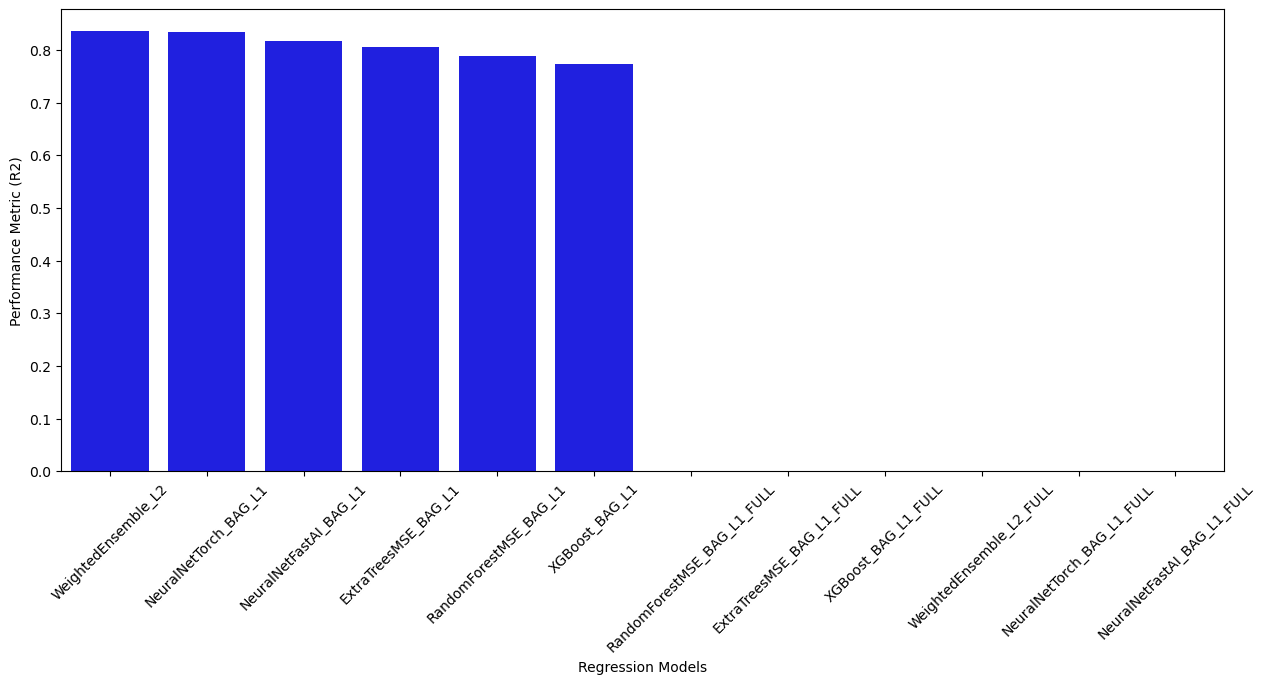

In [29]:
#Evauluate model perfonce
predictor.leaderboard()
f, ax = plt.subplots(figsize = (15, 6))
sns.barplot(x = "model", y = "score_val", data = predictor.leaderboard(), color = "b")
ax.set(ylabel = "Performance Metric (R2)", xlabel = "Regression Models")
plt.xticks(rotation = 45);

In [26]:
# assess model performance
y_predict = predictor.predict(X_test)
y_predict

90     0.684982
254    0.844652
283    0.801857
445    0.905982
461    0.619539
         ...   
372    0.939339
56     0.570060
440    0.536213
60     0.654447
208    0.654403
Name: Chance of Admit, Length: 100, dtype: float32

In [27]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
90,318,106,2,4.0,4.0,7.92,1,0.64
254,321,114,4,4.0,5.0,9.12,0,0.85
283,321,111,3,2.5,3.0,8.90,1,0.80
445,328,116,5,4.5,5.0,9.08,1,0.91
461,301,102,3,2.5,2.0,8.13,1,0.68
...,...,...,...,...,...,...,...,...
372,336,119,4,4.5,4.0,9.62,1,0.95
56,316,102,3,2.0,3.0,7.40,0,0.64
440,305,104,2,2.5,1.5,7.79,0,0.53
60,309,100,2,3.0,3.0,8.10,0,0.48


In [30]:
y_test = X_test['Chance of Admit']
y_test #groundtruth

90     0.64
254    0.85
283    0.80
445    0.91
461    0.68
       ... 
372    0.95
56     0.64
440    0.53
60     0.48
208    0.64
Name: Chance of Admit, Length: 100, dtype: float64

In [32]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# Calculate Root Mean Squared Error (RMSE) and format it to 3 decimal places
# RMSE measures the average magnitude of the errors between predicted and actual values.
# Lower RMSE values indicate a better fit of the model.
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))

# Calculate Mean Squared Error (MSE)
# MSE measures the average squared difference between predicted and actual values.
# Lower MSE values indicate a better fit of the model.
MSE = mean_squared_error(y_test, y_predict)

# Calculate Mean Absolute Error (MAE)
# MAE measures the average magnitude of the errors between predicted and actual values.
# It is less sensitive to outliers compared to MSE.
MAE = mean_absolute_error(y_test, y_predict)

# Calculate R-squared (R2) score
# R2 score indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
# It ranges from 0 to 1, with higher values indicating a better fit of the model.
r2 = r2_score(y_test, y_predict)

# Print the evaluation metrics
print('RMSE =', RMSE, '\nMSE =', MSE, '\nMAE =', MAE, '\nR2 =', r2)


RMSE = 0.064 
MSE = 0.004118925664441472 
MAE = 0.044815418088436115 
R2 = 0.764157765531057


Overall Evaluation:
The regression model demonstrates strong performance, as indicated by the low RMSE and MSE values, which suggest that the model's predictions are close to the actual values. The MAE value, also low, confirms that the errors in the predictions are minor. The R-squared value of approximately 0.7642 shows that the model explains a substantial portion of the variance in the target variable, although there is still some unexplained variability. These results suggest that the model is effective, but there may be opportunities for further refinement to capture more of the variability in the data. Still not bad for a fast exploration of which direction to take. 